Bank customer churn prediction using Artificial Neural Network (ANN)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Bank_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#dropping columns which are not useful
df = df.drop(['CustomerId', 'Surname', 'RowNumber', 'Geography'], axis = 1)

In [8]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#scaling columns tenure, creditscore, age, Balance, Estimatedsalary

cols_to_scale = ['CreditScore','Age','Tenure', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [21]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [22]:
#train test split

X = df.drop('Exited', axis = 1)
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [23]:
print(X_train.shape)
print(X_test.shape)

(8000, 9)
(2000, 9)


In [24]:
#Build a model (ANN) in tensorflow/keras

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(9, input_shape=(9,), activation='relu'),
                          keras.layers.Dense(5, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 510us/step - loss: 0.5248 - accuracy: 0.7835
Epoch 2/100
250/250 [==============================] - 0s 488us/step - loss: 0.4828 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 476us/step - loss: 0.4734 - accuracy: 0.7962
Epoch 4/100
250/250 [==============================] - 0s 506us/step - loss: 0.4611 - accuracy: 0.8019
Epoch 5/100
250/250 [==============================] - 0s 474us/step - loss: 0.4471 - accuracy: 0.8112
Epoch 6/100
250/250 [==============================] - 0s 486us/step - loss: 0.4345 - accuracy: 0.8131
Epoch 7/100
250/250 [==============================] - 0s 479us/step - loss: 0.4246 - accuracy: 0.8194
Epoch 8/100
250/250 [==============================] - 0s 469us/step - loss: 0.4140 - accuracy: 0.8238
Epoch 9/100
250/250 [==============================] - 0s 472us/step - loss: 0.4062 - accuracy: 0.8282
Epoch 10/100
250/250 [==============================] - 0s 475us/step - l

In [25]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 459us/step - loss: 0.3625 - accuracy: 0.8540


[0.36247166991233826, 0.8539999723434448]

In [26]:
yp = model.predict(X_test)
yp[:5]

array([[0.02863419],
       [0.07709438],
       [0.12135848],
       [0.12176463],
       [0.07722479]], dtype=float32)

In [27]:
y_pred = []

for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [29]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [30]:
#metrics

from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.78      0.39      0.52       405

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

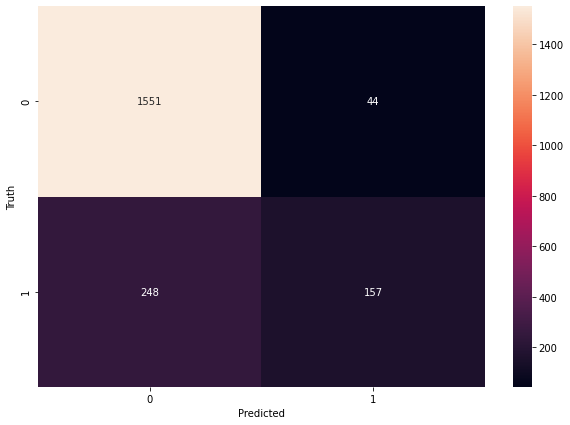

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
accuracy = (1551+157)/(1551+157+248+44)
accuracy

0.854

In [34]:
#precision for 0 class
(1551)/(1551+248)

0.8621456364647027

In [35]:
#precision for 1 class
(157)/(157+44)

0.7810945273631841

In [36]:
#recall for 0 class
(1551)/(1551+44)

0.9724137931034482

In [37]:
#recall for 1 class
(157)/(157+248)

0.38765432098765434

In [41]:
f1_score_0 = (2*0.86*0.97)/(0.86+0.97)
f1_score_1 = (2*0.78*0.38)/(0.78+0.38)

print(f'f1-score for class 0 : {f1_score_0}')
print(f'f1-score for class 1 : {f1_score_1}')

f1-score for class 0 : 0.9116939890710382
f1-score for class 1 : 0.5110344827586206
